In [194]:
# packages
import numpy as np 
import matplotlib.pyplot as plt
import os
from scipy import integrate
from scipy.stats import norm

import astropy.coordinates as coord
import astropy.units as u
from scipy import integrate, optimize
import pandas as pd
pd.set_option('display.max_columns', None)

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import astropy.units as u




# graphic parameters
plt.rcParams['font.size'] = 19
plt.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
plt.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
plt.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'
plt.rcParams['axes.linewidth']  = 1.4
plt.rcParams['figure.figsize']  = (8, 4)
plt.rcParams['lines.linewidth'] = 4
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['xtick.major.width'] = 1.8
plt.rcParams['ytick.major.width'] = 1.8   
plt.rcParams['lines.markeredgewidth'] = 2

# defining a numpy seed for random
np.random.seed(0)

# creating a folder to save the plots
pltpath = 'plots/'
if not os.path.exists(pltpath):
    os.makedirs(pltpath)
dpi      = 200     # resolution of saved images
formatIm = '.png'  # format of saved images

# ----- some constants ----- #
G     = 6.6743e-8     # gravitational constant
kb    = 1.3807e-16    # Boltzmann constant
sigma = 5.67e-5       # Stefan-Boltzmann constant
Msun  = 1.9884e33     # sun mass
Rsun  = 6.957e10      # sun radius
m_H   = 1.6726e-24    # mass of the proton/hydrogen
m_e   = 9.1094e-28    # mass of the electron
c     = 2.9979e10     # speed of light
Na    = 6.022140e22   # avogadro number
aRad  = 7.5657e-15    # radiation constant
hPl   = 6.6261e-27    # planck constant
ech   = 4.8032e-10    # electron charge
hbar  = 1.0546e-27

from astropy.wcs import WCS
from astropy.io import fits
import matplotlib.pyplot as plt

In [7]:
wcs_input_dict = {
    'CTYPE1': 'RA---TAN', 
    'CUNIT1': 'deg', 
    'CDELT1': -0.0002777777778, 
    'CRPIX1': 1, 
    'CRVAL1': 337.5202808, 
    'NAXIS1': 1024,
    'CTYPE2': 'DEC--TAN', 
    'CUNIT2': 'deg', 
    'CDELT2': 0.0002777777778, 
    'CRPIX2': 1, 
    'CRVAL2': -20.833333059999998, 
    'NAXIS2': 1024
}
wcs_helix_dict = WCS(wcs_input_dict)
wcs_helix_dict # To check output

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 337.5202808  -20.83333306  
CRPIX : 1.0  1.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.0002777777778  0.0002777777778  
NAXIS : 1024  1024

In [4]:
wcs_helix_list = WCS(naxis=2)
wcs_helix_list.wcs.crpix = [1, 1]
wcs_helix_list.wcs.crval = [337.5202808, -20.833333059999998]
wcs_helix_list.wcs.cunit = ["deg", "deg"]
wcs_helix_list.wcs.ctype = ["RA---TAN", "DEC--TAN"]
wcs_helix_list.wcs.cdelt = [-0.0002777777778, 0.0002777777778]

wcs_helix_list # To check output

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 337.5202808  -20.83333306  
CRPIX : 1.0  1.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.0002777777778  0.0002777777778  
NAXIS : 1024  1024

In [8]:
wcs_helix_list.array_shape = [1024, 1024]
wcs_helix_list

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 337.5202808  -20.833333059999998  
CRPIX : 1.0  1.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.0002777777778  0.0002777777778  
NAXIS : 1024  1024

In [22]:
header_data_unit_list = fits.open('https://github.com/astropy/astropy-data/raw/6d92878d18e970ce6497b70a9253f65c925978bf/tutorials/celestial-coords1/tailored_dss.22.29.38.50-20.50.13_60arcmin.fits')
header_data_unit_list.info()

Filename: /home/juan/.astropy/cache/download/url/21d072715b8ee90ab2fe1405b0e5fb1a/contents
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     121   (2119, 2119)   int16   


In [12]:
image = header_data_unit_list[0].data
header = header_data_unit_list[0].header
header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                   16 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 2119                                                  
NAXIS2  =                 2119                                                  
DATE    = '03/09/19          ' /Date of FITS file creation                      
ORIGIN  = 'CASB -- STScI     ' /Origin of FITS image                            
PLTLABEL= 'J 10265           ' /Observatory plate label                         
PLATEID = '04I5              ' /GSSS Plate ID                                   
REGION  = 'S602              ' /GSSS Region Name                                
DATE-OBS= '1985-06-15'         / UT date of Observation                         
UT      = '18:30:00.00       ' /UT time of observation                          
EPOCH   =  1.9854542236328E+

In [13]:
wcs_helix = WCS(header)
wcs_helix

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 336.6811440416667  -19.745016572222223  
CRPIX : 2499.6447489941065  3378.9002584168584  
PC1_1 PC1_2  : 0.025282857855146917  4.4684674035885186e-05  
PC2_1 PC2_2  : -4.8420685266167345e-05  0.0252859566668733  
CDELT : -0.01867333422948538  0.01867333422948538  
NAXIS : 2119  2119

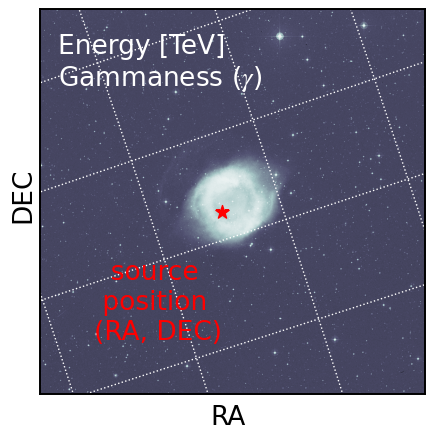

In [195]:
fig, ax = plt.subplots(figsize=(5, 5), subplot_kw={'projection': wcs_helix})
im = plt.imshow(image, origin='lower', cmap='bone', aspect='equal')
ax.set_xlabel(r'RA')
ax.set_ylabel(r'DEC')

overlay = ax.get_coords_overlay('galactic')
overlay.grid(color='white', ls=':', lw=1)

overlay[0].set_ticks(color='white', alpha=0)
overlay[1].set_ticks(color='white', alpha=0)
overlay[0].set_ticklabel('white', alpha=0)
overlay[1].set_ticklabel('white', alpha=0)
overlay[0].set_axislabel(None, alpha=0)
overlay[1].set_axislabel(None, alpha=0)

ra = ax.coords[0]
dec = ax.coords[1]

for x in [ra, dec, overlay[0], overlay[1]]:
    x.set_ticks_visible(False)
    x.set_ticklabel_visible(False)
    x.set_axislabel('')
    
ax.text(937, -165, 'RA')
ax.text(-165, 980, 'DEC', rotation=90)

ax.scatter(1000, 1000, marker='*', color='r', s=100)
ax.text(300, 300, '  source\n position\n(RA, DEC)', color='r')

ax.text(100, 1700, 'Energy [TeV]\nGammaness ($\gamma$)', color='w')


plt.savefig(f'{pltpath}sample_optical{formatIm}', bbox_inches='tight', dpi=dpi)
plt.show()